# 1. Preliminary

## 1.1 Context

## 1.2 Imports

In [2]:
import os, sys, time

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

import spacy

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px


from pandarallel import pandarallel

pandarallel.initialize()

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [3]:
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /home/alex/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /home/alex/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## 1.3 Loading data

In [4]:
# our file

data = "./data/cleaned/"
os.listdir(data)

['df.csv']

In [5]:
# load dataframe

fn = data + 'df.csv'

df = pd.read_csv(fn)

In [6]:
df.head()

,name,history_text,_score,_log_score,_len_name,_len_history_text,_cat,_log_cat
0,3-D Man,"Delroy Garrett, Jr. grew up to become a track ...",6.0,1.791759,7,509,e,d
1,514A (Gotham),He was one of the many prisoners of Indian Hil...,10.0,2.302585,13,3755,e,c
2,A-Bomb,"Richard ""Rick"" Jones was orphaned at a young ...",20.0,2.995732,6,5849,e,c
3,Aa,Aa is one of the more passive members of the P...,12.0,2.484907,2,5924,e,c
4,Aaron Cash,Aaron Cash is the head of security at Arkham A...,5.0,1.609438,10,123,e,d


# 5. Working with text SEPARATE NOTEBOOK

##  5.1 10 random texts 

In [7]:
df.rename(columns={"name" : "_name"}, inplace=True)

In [8]:
df.sample(10)

,_name,history_text,_score,_log_score,_len_name,_len_history_text,_cat,_log_cat
1003,Shao Kahn,Shao Kahn was originally a royal advisor to th...,75.0,4.317488,9,14794,d,b
763,Mera (New 52),Mera is the princess of the underwater kingdom...,16.0,2.772589,13,124,e,c
1035,Solomon Grundy,"Cyrus Gold (Solomon Grundy), is a Zombie super...",7.0,1.945910,14,12942,e,d
506,Hawkwoman,"Born on Thanagar, Hawkwoman protected all that...",8.0,2.079442,9,79,e,d
724,Mach-IV,Abner Jenkins was a master mechanic at an airc...,8.0,2.079442,7,2049,e,d
282,Crimson Dynamo,The first Crimson Dynamo was also the creator ...,10.0,2.302585,14,1394,e,c
494,Harrison Wells (CW),"Dr. Harrison ""Harry"" Wells is the founder of S...",9.0,2.197225,19,1308,e,c
656,Kilowog,Bolovax Vik was one of the most crowded plan...,15.0,2.708050,7,5112,e,c
900,Proxima Midnight (MCU),Proxima Midnight was one of Thanos' children a...,6.0,1.791759,22,562,e,d
1229,Wu,"Wu was born to the First Spinjitzu Master, alo...",18.0,2.890372,2,941,e,c


In [9]:
df_samp = df.sample(20)
df_samp

,_name,history_text,_score,_log_score,_len_name,_len_history_text,_cat,_log_cat
534,Hulk (Stark Gauntlet) (MCU),After Tony created a new gaunlet Hulk uses it ...,47.0,3.850148,27,65,e,b
826,Neuro,Neuro was born as the descendant of the Elemen...,13.0,2.564949,5,203,e,c
198,Brickster,Imagine all the bricks in a house coming to li...,4.0,1.386294,9,544,e,d
670,Kraven the Hunter,Kraven was a maniacal big game hunter who soug...,5.0,1.609438,17,1940,e,d
1032,Slenderman,The Slender Man has no specifically confirmed ...,65.0,4.174387,10,6174,d,b
733,Magus,"The Technarchy aliens are a sentient form of ""...",17.0,2.833213,5,2492,e,c
443,General Vex,"Vex was born in the village of the Formlings, ...",3.0,1.098612,11,414,e,d
1114,The Green Hornet,Britt Reid is the only child of crusading Chic...,6.0,1.791759,16,5049,e,d
584,Jar Jar Binks,"Jar Jar Binks is a Gungan, an amphibious spec...",2.0,0.693147,13,704,e,e
605,John Wraith,John Wraith was part of Team X along with Wolv...,8.0,2.079442,11,3403,e,d


In [10]:
for idx, ser in df_samp.iterrows(): 

    _len = len(ser["history_text"])
    _score = round(ser['_score'], 2)
    _log_score = round(ser['_log_score'], 2)
    _txt = "\t"+ser["history_text"].strip()
    txt_1 = f"name : {ser['_name']}, score/log_score : {_score}/{_log_score}, len_txt :{_len}, history:\n"
    
    print(txt_1+_txt[:300]+ "..." + "\n\n")

name : Hulk (Stark Gauntlet) (MCU), score/log_score : 47.0/3.85, len_txt :65, history:
	After Tony created a new gaunlet Hulk uses it to revive everyone....


name : Neuro, score/log_score : 13.0/2.56, len_txt :203, history:
	Neuro was born as the descendant of the Elemental Master of Mind. He unlocked his own True Potential before the events of The Tournament of Elements and became a contestant in the Tournament of Elements....


name : Brickster, score/log_score : 4.0/1.39, len_txt :544, history:
	Imagine all the bricks in a house coming to life and starting to roll around looking for stuff to break and havoc to wreck. Bricksters have been caught in the structures of houses, pillars and bridges for years. Now they are free and they are having the time of their lives. They don’t ever want to ...


name : Kraven the Hunter, score/log_score : 5.0/1.61, len_txt :1940, history:
	Kraven was a maniacal big game hunter who sought to defeat Spider-Man to prove that he was the greatest hunter 

In [11]:
def print_sample(sub_df, n_samp=10, n_char=1000) : 
    """ """
    
    if n_samp < len(sub_df): 
        df_samp = sub_df.sample(n_samp)
    else : 
        df_samp = sub_df.copy()
    
    for idx, ser in df_samp.iterrows(): 

        _len = len(ser["history_text"])
        _score = round(ser['_score'], 2)
        _log_score = round(ser['_log_score'], 2)
        _txt = "\n"+ser["history_text"].strip()
        txt_1 = f"name : {ser['_name']}, score/log_score : {_score}/{_log_score}, len_txt :{_len}, history:\n"

        print(txt_1+_txt[:n_char]+ "..." + "\n\n\n")

In [12]:
df_a = df[df._cat=="a"]
df_a.head()

,_name,history_text,_score,_log_score,_len_name,_len_history_text,_cat,_log_cat
99,Aztar,Since the beginnings of human civilization the...,222.0,5.402677,5,3796,a,a
339,Devilman,Transformation Akira is first seen walking hom...,229.0,5.433722,8,27732,a,a
365,Dracula,The man later known as Dracula was originally...,211.0,5.351858,7,23504,a,a
459,Golden Ninja,"Lloyd becomes the Golden Ninja, and fights the...",226.0,5.420535,12,266,a,a
469,Great Evil Beast,The Great Evil Beast was formed when God utter...,237.0,5.468060,16,5295,a,a


In [13]:
print_sample(df_a)

name : Aztar, score/log_score : 222.0/5.4, len_txt :3796, history:

Since the beginnings of human civilization the Spectre Force, or the Divine Wrath has patrolled the lands of man. Watching, waiting in the night for the unjustly killed, the murdered and the butchered. Then swift judgment gives bloody vengeance to the murderers. Since the birth of Christ, the Wrath has been bonded to a mortal host, to be its moral guide and anchor to humanity. In the twentieth century that anchor was detective Jim Corrigan. As the Spectre they were one of the most powerful beings in the universe.  If we are to believe the texts, three seconds after creation there was a rebellion in Paradise. A rebel band of angels led by Lucifer Morningstar attempted to wrestle control of Heaven from the Presence. As punishment they were cast out to the burning planes of Hell where they became the beings that mortal men know as demons. It is not always realized but is possible for demons of repent, one such repentant d

In [14]:
print_sample(df[df._cat=="b"])

name : Goblin Force, score/log_score : 169.0/5.13, len_txt :1953, history:

The Goblin Force was born at the beginning of reality during the Big Bang. Like the Phoenix Force, it had limitless power, but unlike the Phoenix, it derived power from its ravenous hunger that couldn't be sated. Its hunger lead it to devour entire galaxies when it encountered the Phoenix Force, the Phoenix stood against it only to be consumed. Even Galactus, the devourer of worlds fell to the power of the Goblin Force's hunger. It wasn't until the 5th Host of the Celestials stood against the Goblin Force that it met defeat, though it wasn't destroyed. The Celestials eventually died from the battle, leaving the Goblin force only to be contained.  Many years later, the Goblin Force seized the opportunity to attach itself to the life force of Madelyne Pryor, making her its conduit into the world again, being reborn as the Goblin Queen through the corruption of Madelyne Pryor. As the Goblin Force gradually took ov

In [15]:
print_sample(df[df._cat=="b"])

name : Goblin Force, score/log_score : 169.0/5.13, len_txt :1953, history:

The Goblin Force was born at the beginning of reality during the Big Bang. Like the Phoenix Force, it had limitless power, but unlike the Phoenix, it derived power from its ravenous hunger that couldn't be sated. Its hunger lead it to devour entire galaxies when it encountered the Phoenix Force, the Phoenix stood against it only to be consumed. Even Galactus, the devourer of worlds fell to the power of the Goblin Force's hunger. It wasn't until the 5th Host of the Celestials stood against the Goblin Force that it met defeat, though it wasn't destroyed. The Celestials eventually died from the battle, leaving the Goblin force only to be contained.  Many years later, the Goblin Force seized the opportunity to attach itself to the life force of Madelyne Pryor, making her its conduit into the world again, being reborn as the Goblin Queen through the corruption of Madelyne Pryor. As the Goblin Force gradually took ov

In [16]:
print_sample(df[df._cat=="c"])

name : Destruction Of The Endless, score/log_score : 112.0/4.72, len_txt :97, history:

Destruction is the fourth eldest of the Endless. He is the embodiment of destruction and creation...



name : Doctor Strange (Classic), score/log_score : 120.0/4.79, len_txt :38541, history:

Stephen Strange was born to Eugene and Beverly Strange in 1930 while the couple was vacationing in Philadelphia. In 1932 Stephen's sister Donna was born at the family's Nebraska farm. Knowing that Strange was destined to become the next Sorcerer Supreme, resentful apprentice sorcerer Karl Mordo beset the child with demons from the age of eight, and on throughout his youth. Ultimately Strange was rescued by Mordo's master, the Ancient One, mystic protector of the Earth-realm as the current Sorcerer Supreme. A year or two after this torment began, Stephen's brother, Victor, was born. At age eleven Strange aided an injured Donna, an experience which ultimately fostered an interest in medicine. Strange entered New

In [17]:
print_sample(df[df._cat=="d"])

name : Sonic The Hedgehog, score/log_score : 53.0/3.97, len_txt :129594, history:

Past Not much is known about Sonic's early life. He was born on Christmas Island with his abnormal ability to run at super-speed, but his love for adventure eventually called him away from his home. Since then, he has spent his life traveling the globe, driven by his restless spirit, in search of adventures to satisfy his thirst for thrills. At some point, Sonic met Dr. Ivo Robotnik and they became enemies. Sonic would subsequently fight Robotnik in an untold number of confrontations as the scientist attempted time and again to conquer the world, with Sonic foiling the doctor's plans each time. Despite their many battles, Sonic did not really account for his adversary. Sonic the Hedgehog (1991) In Sonic the Hedgehog, Sonic heard the news about Dr. Robotnik invading South Island after the doctor had discovered some powerful relics, called the "Chaos Emeralds", which were hidden on the island and which he 

In [18]:
print_sample(df[df._cat=="e"])

name : Lightray, score/log_score : 19.0/2.94, len_txt :114, history:

Solis is one of the New Gods of New Genesis. As a boy he established a close friendship with fellow New God Orion....



name : Kale, score/log_score : 17.0/2.83, len_txt :9644, history:

When Universe 7 is selecting their team, Kale is one of the foes from another Universe pictured by Old Kai. She is a member of Caulifla's gang as well as her protégé. She is often looked down upon by other Saiyans of Universe 6 for her timid personality. After Cabba teaches Caulifla how to attain the Super Saiyan form, he and Caulifla work together to help Kale obtain it. It initially doesn't work, but after seeing Cabba and Caulifla "flirting", Kale is able to unleash her anger and utilize an "Berserker" state of the Super Saiyan transformation. Upon entering her berserk state, she immediately calls out Cabba and viciously attacks him in an attempt to kill him. Kale almost succeeds, however, Caulifla manages to awaken her Super Sai

# work on One

In [19]:
txt = df.history_text.sample(1)
txt = txt.values[0]
txt

'Achilles Warkiller was created by Zeus to counter to Wonder Woman.'

In [20]:
txt = txt.lower()
txt

'achilles warkiller was created by zeus to counter to wonder woman.'

In [21]:
txt = txt.strip().replace("  ", " ")

In [22]:
txt[:30]

'achilles warkiller was created'

In [23]:
from nltk.tokenize import word_tokenize, wordpunct_tokenize

In [24]:
raw_tokens_list  = word_tokenize(txt)
raw_tokens_list[:30]

['achilles',
 'warkiller',
 'was',
 'created',
 'by',
 'zeus',
 'to',
 'counter',
 'to',
 'wonder',
 'woman',
 '.']

In [25]:
len(raw_tokens_list)

12

In [26]:
from nltk.corpus import stopwords

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/alex/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'more', 'few', 'as', 'while', 'what', 'no', 'why', 'couldn', 'won', 'an', 'itself', 'her', 'were', 'our', 'wasn', 'be', 'against', 'during', 'under', 'themselves', 'yours', 'have', 'out', 'same', 'herself', 'been', 'did', 'their', 'both', "that'll", "hasn't", 'shouldn', 'your', 'into', "you've", 'has', 'it', 'or', 'this', 'than', 'himself', 'only', 'here', 'how', 'for', 'ma', 'yourselves', 'being', 'not', "it's", 'between', "she's", 'so', 'my', 'o', "didn't", 'other', 'below', 'they', 'having', 'by', 'then', 'will', 'am', 'she', "don't", 'you', 'but', 'before', 'don', 'above', 'of', 'if', 'can', "wouldn't", 'we', 'weren', 'are', 'ain', "weren't", "you'd", "mightn't", 't', 'doesn', 'ourselves', "isn't", "you'll", 'had', 'hers', 'where', "shan't", 'in', "shouldn't", 'shan', 'him', 'further', "needn't", "couldn't", 'haven', 'm', 'most', 'nor', 'aren', 'myself', 'just', 'its', 'from', 'each', 'now', 'theirs', 'do', 'them', 'that', 'some', 'over', 'ours', "you're", 'the', 'didn', 'hadn', '

In [29]:
cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]

In [30]:
cleaned_tokens_list[:50]

['achilles', 'warkiller', 'created', 'zeus', 'counter', 'wonder', 'woman', '.']

In [31]:
len(cleaned_tokens_list)

8

In [32]:
from nltk.tokenize import RegexpTokenizer

In [33]:



raw_tokens_list[:50]

['achilles',
 'warkiller',
 'was',
 'created',
 'by',
 'zeus',
 'to',
 'counter',
 'to',
 'wonder',
 'woman',
 '.']

In [34]:
raw_tokens_list

['achilles',
 'warkiller',
 'was',
 'created',
 'by',
 'zeus',
 'to',
 'counter',
 'to',
 'wonder',
 'woman',
 '.']

In [35]:
cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]

In [36]:
cleaned_tokens_list[:50]

['achilles', 'warkiller', 'created', 'zeus', 'counter', 'wonder', 'woman', '.']

In [37]:
len(cleaned_tokens_list)

8

In [38]:
def process_text(txt, rejoin=False) : 
    
    txt = txt.lower().strip()
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(txt)
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    if rejoin : 
        return " ".join(cleaned_tokens_list)
    
    return cleaned_tokens_list

In [39]:
corpus = list(df.history_text.values)
corpus[:3]

["Delroy Garrett, Jr. grew up to become a track star and competed in the Olympic Games. After he tested positive for steroids, he lost his three gold medals. In despair, he turned to religion, specifically the Triune Understanding. This group's founder, Jonathan Tremont, had found one of three fragments of a mysterious object and used it to give Garrett the powers of 3-D Man. Garrett assumed that his powers were because of his newfound spiritual enlightenment, and Tremont never disabused him of the notion.",
 'He was one of the many prisoners of Indian Hill to be transferred to another facility upstate on the orders of The Court. However, Fish Mooney hijacks the bus and drives it into Gotham City, where the bus crashes when fired upon by Butch Gilzean and his gang. After the mobsters flee at the sight of a resurrected Fish, she herself leaves the scene. An elderly hobo lady hears the cries of the prisoners and releases them, only to be horrified by their monstrous appearance. The monst

In [40]:
corpus = "".join(corpus)
corpus[:5000]

'Delroy Garrett, Jr. grew up to become a track star and competed in the Olympic Games. After he tested positive for steroids, he lost his three gold medals. In despair, he turned to religion, specifically the Triune Understanding. This group\'s founder, Jonathan Tremont, had found one of three fragments of a mysterious object and used it to give Garrett the powers of 3-D Man. Garrett assumed that his powers were because of his newfound spiritual enlightenment, and Tremont never disabused him of the notion.He was one of the many prisoners of Indian Hill to be transferred to another facility upstate on the orders of The Court. However, Fish Mooney hijacks the bus and drives it into Gotham City, where the bus crashes when fired upon by Butch Gilzean and his gang. After the mobsters flee at the sight of a resurrected Fish, she herself leaves the scene. An elderly hobo lady hears the cries of the prisoners and releases them, only to be horrified by their monstrous appearance. The monsters d

In [41]:
cleaned_corpus = process_text(corpus)
cleaned_corpus

['delroy',
 'garrett',
 'jr',
 'grew',
 'become',
 'track',
 'star',
 'competed',
 'olympic',
 'games',
 'tested',
 'positive',
 'steroids',
 'lost',
 'three',
 'gold',
 'medals',
 'despair',
 'turned',
 'religion',
 'specifically',
 'triune',
 'understanding',
 'group',
 'founder',
 'jonathan',
 'tremont',
 'found',
 'one',
 'three',
 'fragments',
 'mysterious',
 'object',
 'used',
 'give',
 'garrett',
 'powers',
 '3',
 'man',
 'garrett',
 'assumed',
 'powers',
 'newfound',
 'spiritual',
 'enlightenment',
 'tremont',
 'never',
 'disabused',
 'notion',
 'one',
 'many',
 'prisoners',
 'indian',
 'hill',
 'transferred',
 'another',
 'facility',
 'upstate',
 'orders',
 'court',
 'however',
 'fish',
 'mooney',
 'hijacks',
 'bus',
 'drives',
 'gotham',
 'city',
 'bus',
 'crashes',
 'fired',
 'upon',
 'butch',
 'gilzean',
 'gang',
 'mobsters',
 'flee',
 'sight',
 'resurrected',
 'fish',
 'leaves',
 'scene',
 'elderly',
 'hobo',
 'lady',
 'hears',
 'cries',
 'prisoners',
 'releases',
 'horrif

In [42]:
len(cleaned_corpus)

490183

In [43]:
tmp = pd.Series(cleaned_corpus).value_counts()

In [44]:
len(df)

1249

In [45]:
tmp.describe()

count    28454.000000
mean        17.227209
std         69.723289
min          1.000000
25%          1.000000
50%          3.000000
75%          9.000000
max       2289.000000
dtype: float64

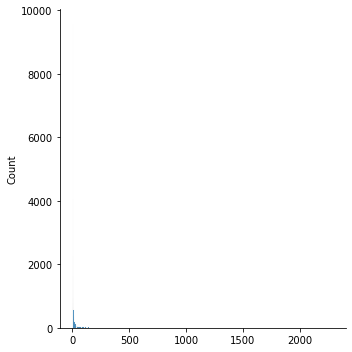

In [46]:
sns.displot(tmp.values)

In [47]:
tmp.head(30)

time          2289
new           2244
x             2229
man           2155
one           2125
would         2047
later         1857
however       1648
earth         1577
team          1517
back          1438
men           1402
also          1314
power         1293
life          1215
sonic         1213
could         1196
powers        1183
became        1157
two           1136
world         1103
battle        1094
death         1090
help          1053
first         1053
eventually    1000
found          992
black          973
father         973
returned       947
dtype: int64

In [48]:
tmp.tail(30)

monaghan        1
sidhe           1
ectoplasm       1
countess        1
ilona           1
kakosy          1
raskine         1
infamy          1
firefighting    1
mania           1
shayera         1
206             1
aldus           1
hath            1
trotting        1
jumble          1
zauriel         1
roch            1
stonechat       1
katar           1
amicable        1
hol             1
byth            1
pyromaniac      1
pseudonym       1
2166            1
potentials      1
maroon          1
aberrations     1
misjudged       1
dtype: int64

In [49]:
# sns.countplot(pd.Series(cleaned_corpus))

In [50]:
list_unique_words = tmp[tmp==1]
list_unique_words[:30]

combo          1
diverting      1
tryout         1
speedfreek     1
revamps        1
x5edit         1
genre          1
intiative      1
decreeing      1
relocates      1
cliches        1
evacuating     1
1602           1
founds         1
masterpiece    1
adhered        1
tumbalt        1
kalthea        1
loveable       1
aggregation    1
understands    1
midland        1
philly         1
jacobs         1
bladder        1
starcore       1
accedes        1
producers      1
toes           1
thorn          1
dtype: int64

In [51]:
list_unique_words = list(list_unique_words.index)
list_unique_words[:30]

['combo',
 'diverting',
 'tryout',
 'speedfreek',
 'revamps',
 'x5edit',
 'genre',
 'intiative',
 'decreeing',
 'relocates',
 'cliches',
 'evacuating',
 '1602',
 'founds',
 'masterpiece',
 'adhered',
 'tumbalt',
 'kalthea',
 'loveable',
 'aggregation',
 'understands',
 'midland',
 'philly',
 'jacobs',
 'bladder',
 'starcore',
 'accedes',
 'producers',
 'toes',
 'thorn']

In [52]:
def process_text(txt, rejoin=False) : 
    
    txt = txt.lower().strip()
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(txt)
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    non_unique_tokens_list = [w for w in cleaned_tokens_list not in list_unique_words]
    more_than_3 =  [w for w in non_unique_tokens_list if len(w) > 3 ]
    
    alpha_num = [w for w in more_than_3 if w.isalpha()]
    
    
    if rejoin : 
        return " ".join(cleaned_tokens_list)
    
    return cleaned_tokens_list

In [53]:
"a12".isalpha()

False

In [54]:
cleaned_corpus[:100]

['delroy',
 'garrett',
 'jr',
 'grew',
 'become',
 'track',
 'star',
 'competed',
 'olympic',
 'games',
 'tested',
 'positive',
 'steroids',
 'lost',
 'three',
 'gold',
 'medals',
 'despair',
 'turned',
 'religion',
 'specifically',
 'triune',
 'understanding',
 'group',
 'founder',
 'jonathan',
 'tremont',
 'found',
 'one',
 'three',
 'fragments',
 'mysterious',
 'object',
 'used',
 'give',
 'garrett',
 'powers',
 '3',
 'man',
 'garrett',
 'assumed',
 'powers',
 'newfound',
 'spiritual',
 'enlightenment',
 'tremont',
 'never',
 'disabused',
 'notion',
 'one',
 'many',
 'prisoners',
 'indian',
 'hill',
 'transferred',
 'another',
 'facility',
 'upstate',
 'orders',
 'court',
 'however',
 'fish',
 'mooney',
 'hijacks',
 'bus',
 'drives',
 'gotham',
 'city',
 'bus',
 'crashes',
 'fired',
 'upon',
 'butch',
 'gilzean',
 'gang',
 'mobsters',
 'flee',
 'sight',
 'resurrected',
 'fish',
 'leaves',
 'scene',
 'elderly',
 'hobo',
 'lady',
 'hears',
 'cries',
 'prisoners',
 'releases',
 'horrif

In [55]:
len(set(cleaned_corpus))

28454

In [56]:



  
lemmatizer = WordNetLemmatizer()

In [57]:
lemmatizer.lemmatize("cars")

'car'

In [58]:

 
ps = PorterStemmer()

In [65]:
lemm_cleanned_corpus = [lemmatizer.lemmatize(i) for i in cleaned_corpus ]

In [66]:
len(set(lemm_cleanned_corpus))

25671

In [59]:
def process_text(txt, rejoin=True, lemm_or_stemm = "stem") : 
    """global text processing function"""
    
    # lower and strip
    txt = txt.lower().strip()
    
    # tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(txt)
    
    # remove stop words
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    # drop unique tokens
    non_unique_tokens_list = [w for w in cleaned_tokens_list if w not in list_unique_words]
    
    # keep only len word > 3
    more_than_3 =  [w for w in non_unique_tokens_list if len(w) > 3 ]
    
    # keep only alpha not num
    alpha_num = [w for w in more_than_3 if w.isalpha()]
    
    # stem or lem
    if lemm_or_stemm == "lem" : 
        trans = WordNetLemmatizer()
        trans_text = [trans.lemmatize(i) for i in alpha_num ]
    else : 
        trans = PorterStemmer()
        trans_text = [trans.stem(i) for i in alpha_num ]
    
    #  return a list or a string
    if rejoin : 
        return " ".join(trans_text)
    
    return trans_text

In [ ]:
df["cleaned_history"] = df.history_text.apply(lambda i : process_text(i))

In [ ]:
df.history_text

In [ ]:
df.cleaned_history

In [ ]:
!pip install sklearn

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf = TfidfVectorizer()

In [ ]:
res = tf.fit_transform(df.cleaned_history)

In [ ]:
res

In [ ]:
res = res.toarray()

In [ ]:
res.